# EDA Notebook
This notebook runs EDA for the MMM project. Replace the data path and run cells as needed.

In [180]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from pathlib import Path
import os
from adjustText import adjust_text
from scipy.stats import zscore
import json
import math

In [181]:
# Dynamically resolve project root (works in both scripts & notebooks)
try:
    proj = Path(__file__).resolve().parents[1]   # if running as script
except NameError:
    proj = Path(os.getcwd()).resolve().parents[0]  # if running in Jupyter (inside eda/)

# Output directory
OUT_DIR = proj / "outputs" / "robustness"
# Load CV results
cv_path = OUT_DIR / "ridge_cv_mse.csv"
alpha_path = OUT_DIR / "ridge_alpha.json"

In [156]:

df=pd.read_excel(path)

In [157]:
df.head()

,date,kpi_val_sales_mn,vol_sales_mn,wtd_dist_max,num_dist_max,trade_promo_spends_mn,consumer_promo_spends_mn,newspaper_spends_mn,newspaper_impressions,tv_total_grp,...,whatsapp_clicks,whatsapp_impressions_mn,whatsapp_spends_mn,jio_clicks,jio_impressions_mn,jio_spends_mn,hotstar_clicks,hotstar_impressions_mn,hotstar_spends_mn,ventes_avenue_spends_mn
0,2019-01-01,232.467056,302.394,60.339142,28.076869,6.386184,0.000000,0.000000,0,300.21,...,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0000,0.0
1,2019-02-01,214.927168,279.889,60.897473,28.184146,6.903101,0.000000,4.558687,22,397.51,...,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0000,0.0
2,2019-03-01,243.621484,318.025,60.356401,28.494586,6.378913,0.000000,5.228202,11,184.26,...,0,0.0,0.0,0,0.0,0.0,3545,2.533335,0.3828,0.0
3,2019-04-01,251.191704,328.868,58.884626,28.637880,6.807898,0.960220,0.000000,0,0.00,...,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0000,0.0
4,2019-05-01,243.752604,318.636,60.130245,28.579280,4.139811,0.770213,0.000000,0,317.83,...,0,0.0,0.0,0,0.0,0.0,0,0.000000,0.0000,0.0


In [158]:
df.duplicated(keep=False).sum()

0

In [159]:
# Numeric columns only
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

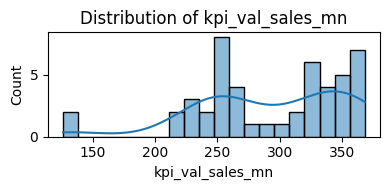

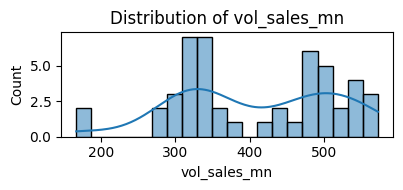

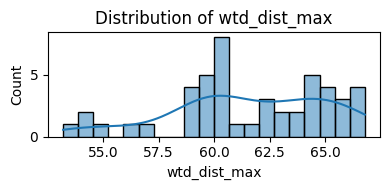

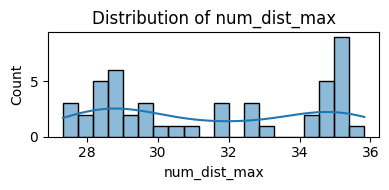

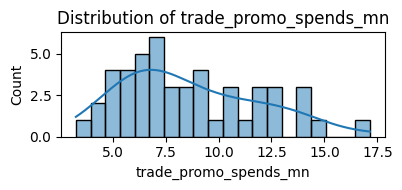

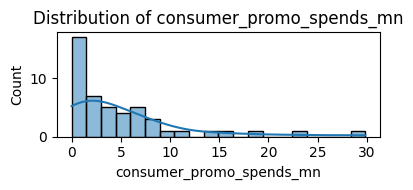

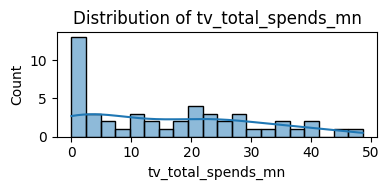

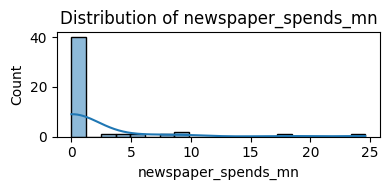

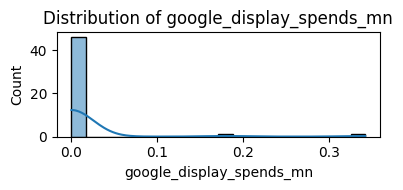

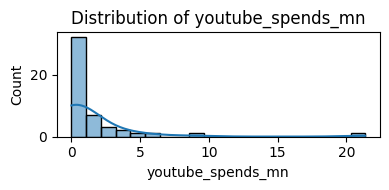

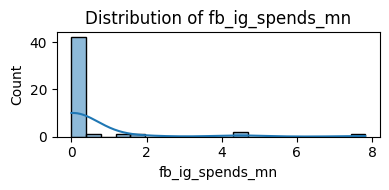

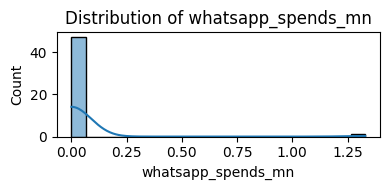

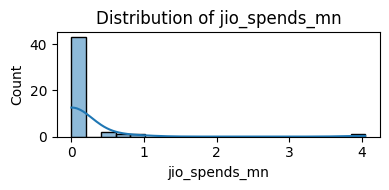

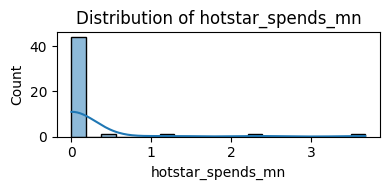

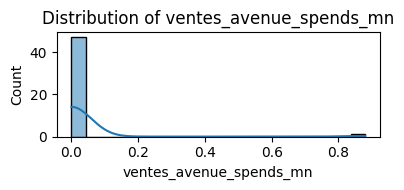

,feature,mean,median,std,min,max,skew,kurtosis
0,kpi_val_sales_mn,293.722501,306.686986,59.224222,126.291278,368.123912,-0.728558,0.297724
1,vol_sales_mn,409.403229,405.809000,105.461019,166.944000,572.466934,-0.208988,-0.893617
2,wtd_dist_max,61.553713,61.286741,3.482679,53.203745,66.772684,-0.510264,-0.318744
3,num_dist_max,31.537910,31.419246,2.947466,27.335125,35.823721,0.107392,-1.693944
4,trade_promo_spends_mn,8.646890,7.807479,3.236527,3.261926,17.150717,0.612304,-0.335202
5,consumer_promo_spends_mn,5.047986,2.797708,6.276398,0.000000,29.834155,2.192258,5.451481
6,tv_total_spends_mn,16.352378,13.852163,14.362966,0.000000,48.603698,0.456555,-0.906647
7,newspaper_spends_mn,1.728549,0.000000,4.787785,0.000000,24.589793,3.471905,12.909428
8,google_display_spends_mn,0.010879,0.000000,0.055317,0.000000,0.342200,5.397035,30.023957
9,youtube_spends_mn,1.427579,0.000000,3.452487,0.000000,21.370000,4.540068,24.344579


In [160]:
# Plot histograms for selected important columns (sales, promos, spends, impressions)
selected_cols = [
    'kpi_val_sales_mn','vol_sales_mn','wtd_dist_max','num_dist_max',
    'trade_promo_spends_mn','consumer_promo_spends_mn',
    'tv_total_spends_mn','newspaper_spends_mn','google_display_spends_mn',
    'youtube_spends_mn','fb_ig_spends_mn','whatsapp_spends_mn','jio_spends_mn','hotstar_spends_mn','ventes_avenue_spends_mn'
]

selected_cols = [c for c in selected_cols if c in num_cols]
summary_stats = []
for col in selected_cols:
    plt.figure(figsize=(4,2))
    sns.histplot(df[col], bins=20, kde=True)
    plt.title(f'Distribution of {col}')
    plt.tight_layout()
    fname = f'dist_{col}.png'
    # plt.savefig(os.path.join(dist_dir,fname))
    # Also show it
    plt.show()
    plt.close()
    summary_stats.append({
        'feature': col,
        'mean': df[col].mean(),
        'median': df[col].median(),
        'std': df[col].std(),
        'min': df[col].min(),
        'max': df[col].max(),
        'skew': df[col].skew(),
        'kurtosis': df[col].kurtosis()
    })

summary_df = pd.DataFrame(summary_stats)
summary_df


In [161]:
df.columns

Index(['date', 'kpi_val_sales_mn', 'vol_sales_mn', 'wtd_dist_max',
       'num_dist_max', 'trade_promo_spends_mn', 'consumer_promo_spends_mn',
       'newspaper_spends_mn', 'newspaper_impressions', 'tv_total_grp',
       'tv_spots', 'tv_total_spends_mn', 'competition1_newspaper_spends_mn',
       'competition1_newspaper_impressions', 'competition1_tv_total_grp',
       'competition1_tv_spots', 'competition1_tv_total_spends_mn',
       'competition2_newspaper_spends_mn',
       'competition2_newspaper_impressions', 'competition2_tv_total_grp',
       'competition2_tv_spots', 'competition2_tv_total_spends_mn',
       'google_display_clicks', 'google_display_impressions_mn',
       'google_display_spends_mn', 'youtube_clicks', 'youtube_impressions_mn',
       'youtube_spends_mn', 'fb_ig_clicks', 'fb_ig_impressions_mn',
       'fb_ig_spends_mn', 'whatsapp_clicks', 'whatsapp_impressions_mn',
       'whatsapp_spends_mn', 'jio_clicks', 'jio_impressions_mn',
       'jio_spends_mn', 'hotstar_cl

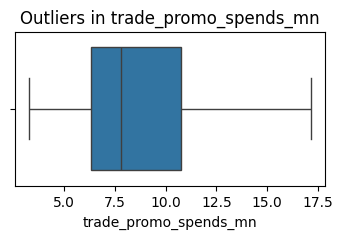

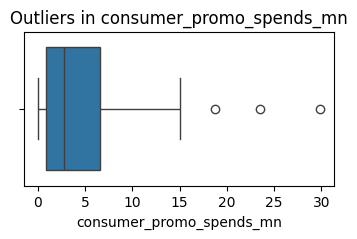

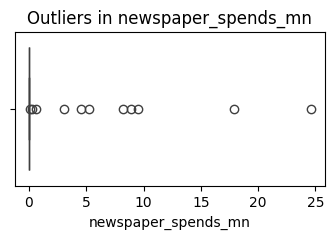

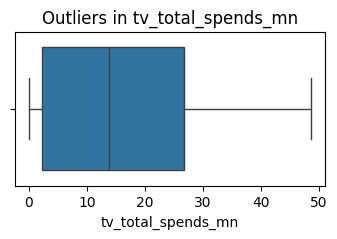

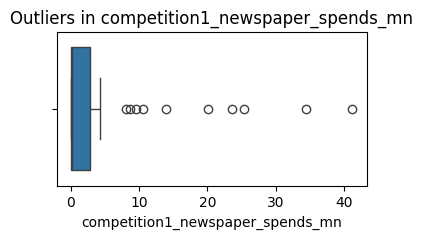

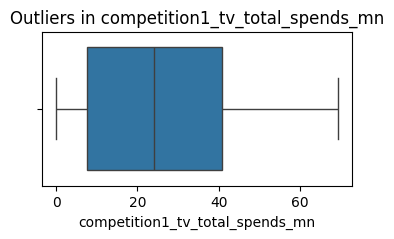

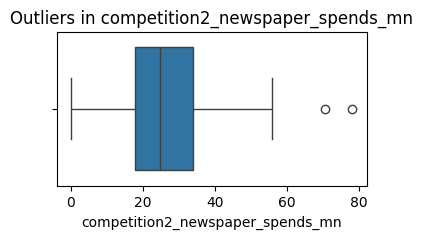

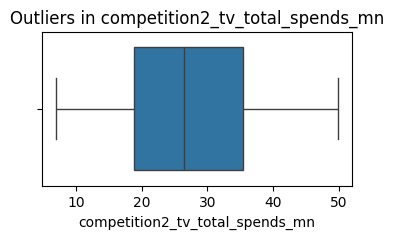

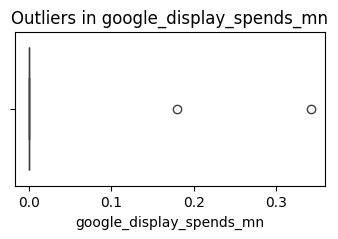

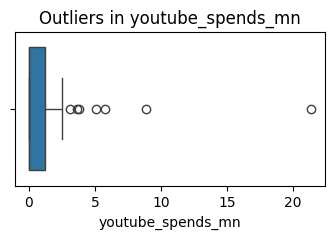

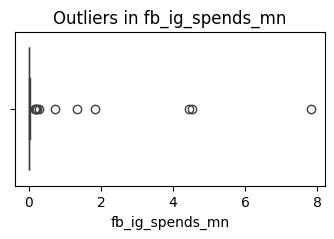

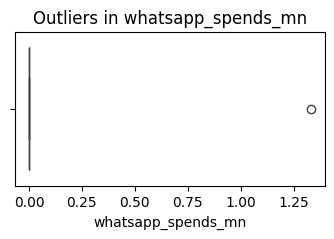

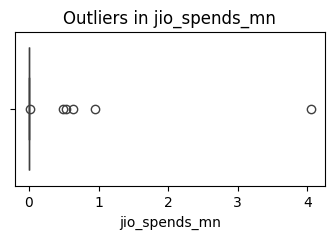

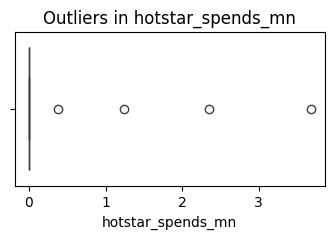

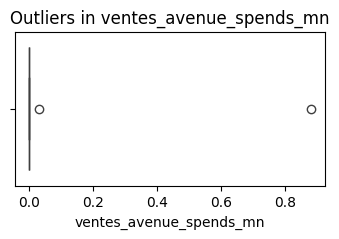

In [162]:
# Example: spend columns
spend_cols = [c for c in df.columns if "spend" in c]

for col in spend_cols:
    plt.figure(figsize=(4,2))
    sns.boxplot(x=df[col])
    plt.title(f"Outliers in {col}")
    plt.show()


In [163]:
df_z = df[spend_cols].apply(zscore)
outliers = (df_z.abs() > 3)  # points beyond 3 std devs
outlier_counts = outliers.sum()
print("Outlier counts per variable:\n", outlier_counts)


Outlier counts per variable:
 trade_promo_spends_mn               0
consumer_promo_spends_mn            1
newspaper_spends_mn                 2
tv_total_spends_mn                  0
competition1_newspaper_spends_mn    2
competition1_tv_total_spends_mn     0
competition2_newspaper_spends_mn    1
competition2_tv_total_spends_mn     0
google_display_spends_mn            2
youtube_spends_mn                   1
fb_ig_spends_mn                     1
whatsapp_spends_mn                  1
jio_spends_mn                       1
hotstar_spends_mn                   2
ventes_avenue_spends_mn             1
dtype: int64


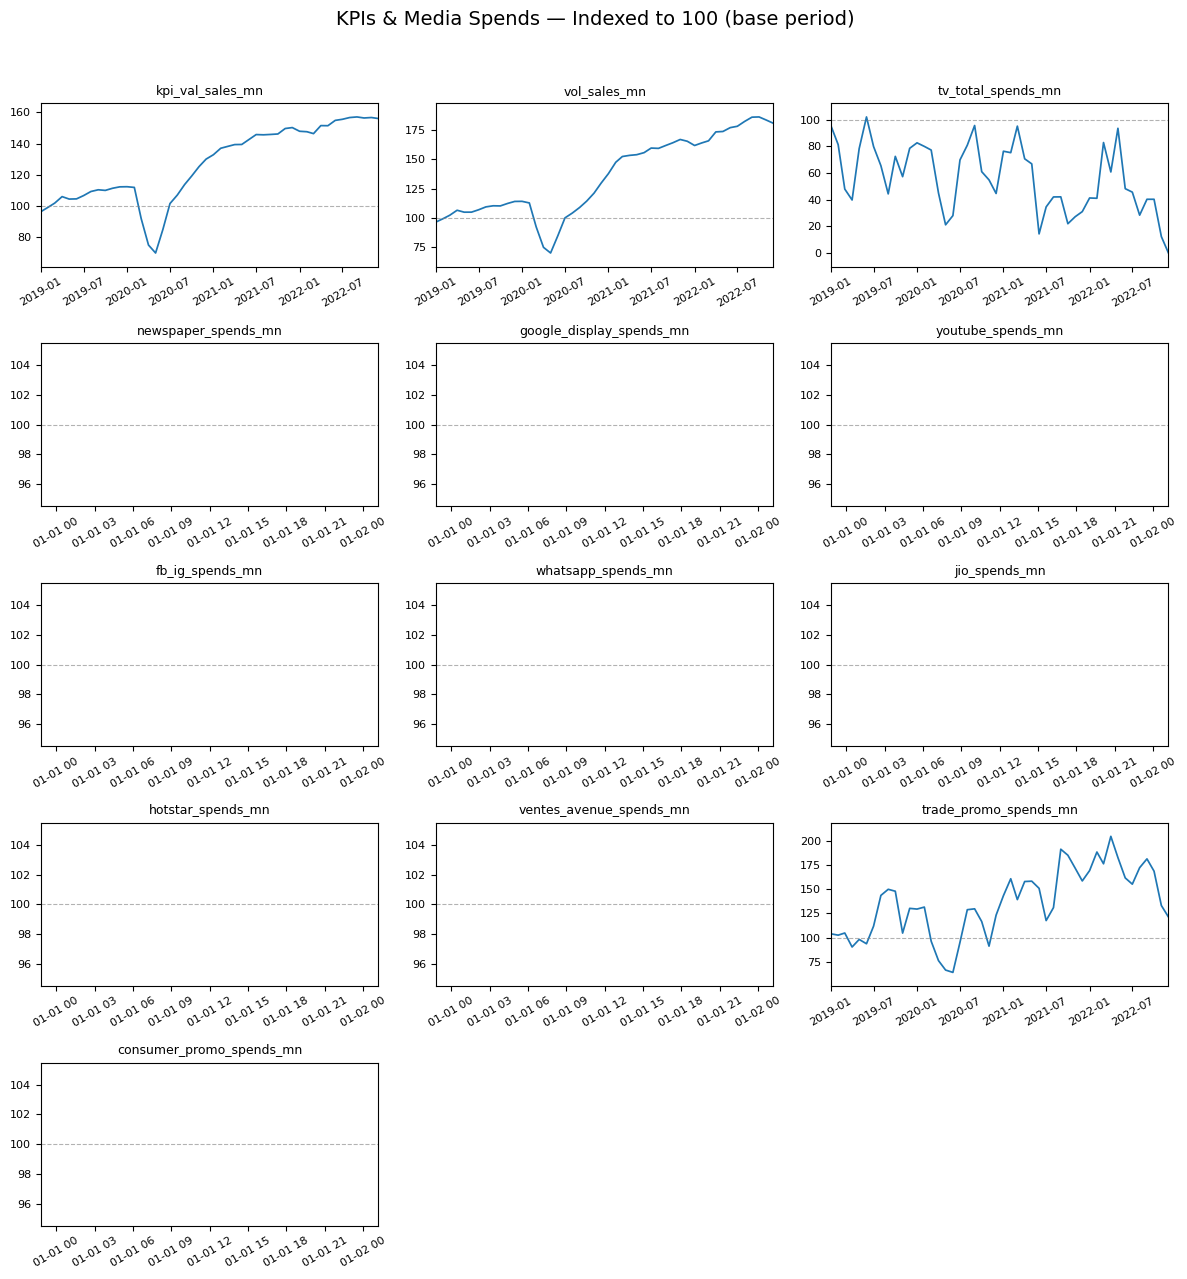

In [164]:
def small_multiples_indexed(
    df,
    cols,
    date_col="date",
    base_period=0,
    ncols=3,
    figsize_per_plot=(4,2.5),
    smoothing_win=None,      # e.g. 3 or 7 for rolling mean; None to disable
    save_path=None,
    title=None
):
    # Defensive copy & parse date
    dfc = df.copy()
    if date_col in dfc.columns:
        dfc[date_col] = pd.to_datetime(dfc[date_col])
    else:
        # ensure index is datetime if no date_col
        if not np.issubdtype(dfc.index.dtype, np.datetime64):
            try:
                dfc.index = pd.to_datetime(dfc.index)
            except Exception:
                pass

    # Filter only available cols
    available = [c for c in cols if c in dfc.columns]
    missing = [c for c in cols if c not in dfc.columns]
    if missing:
        print("Warning: some columns not found and will be skipped:", missing)
    if not available:
        raise ValueError("No requested columns were found in the DataFrame.")

    n = len(available)
    nrows = math.ceil(n / ncols)
    fig_w = ncols * figsize_per_plot[0]
    fig_h = nrows * figsize_per_plot[1]

    fig, axes = plt.subplots(nrows, ncols, figsize=(fig_w, fig_h), squeeze=False)
    axes = axes.flatten()

    for i, col in enumerate(available):
        ax = axes[i]
        s = pd.to_numeric(dfc[col], errors="coerce")
        # index to base period (use first non-null if base invalid)
        try:
            base_val = s.iloc[base_period]
            if pd.isna(base_val) or base_val == 0:
                nonnull = s.dropna()
                if len(nonnull) == 0:
                    indexed = pd.Series(np.nan, index=s.index)
                else:
                    base_val = nonnull.iloc[0]
                    indexed = (s / base_val) * 100.0
            else:
                indexed = (s / base_val) * 100.0
        except Exception:
            # fallback: index by first valid value
            nonnull = s.dropna()
            if len(nonnull) == 0:
                indexed = pd.Series(np.nan, index=s.index)
            else:
                base_val = nonnull.iloc[0]
                indexed = (s / base_val) * 100.0

        if smoothing_win and isinstance(smoothing_win, int) and smoothing_win > 1:
            indexed_plot = indexed.rolling(window=smoothing_win, min_periods=1, center=True).mean()
        else:
            indexed_plot = indexed

        # X axis
        x = dfc[date_col] if date_col in dfc.columns else dfc.index

        ax.plot(x, indexed_plot, linewidth=1.25)
        ax.set_title(col, fontsize=9)
        ax.axhline(100, color="gray", linestyle="--", linewidth=0.8, alpha=0.6)  # base line
        ax.tick_params(axis='x', labelrotation=30, labelsize=8)
        ax.tick_params(axis='y', labelsize=8)
        # Tight axis margins
        ax.margins(x=0)

        # small y-limits padding
        yvals = indexed_plot.dropna()
        if not yvals.empty:
            ymin, ymax = yvals.min(), yvals.max()
            if np.isfinite(ymin) and np.isfinite(ymax):
                pad = max(2.5, (ymax - ymin) * 0.1)
                ax.set_ylim(ymin - pad, ymax + pad)

    # hide empty axes
    for j in range(n, len(axes)):
        axes[j].axis('off')

    if title:
        fig.suptitle(title, fontsize=14)

    plt.tight_layout(rect=[0, 0, 1, 0.96] if title else None)
    if save_path:
        save_path = Path(save_path)
        save_path.parent.mkdir(parents=True, exist_ok=True)
        plt.savefig(save_path, dpi=300, bbox_inches='tight')
        print("Saved figure to", str(save_path))

    plt.show()
    return fig, axes

cols = [
    "kpi_val_sales_mn", "vol_sales_mn",
    "tv_total_spends_mn", "newspaper_spends_mn",
    "google_display_spends_mn", "youtube_spends_mn",
    "fb_ig_spends_mn", "whatsapp_spends_mn",
    "jio_spends_mn", "hotstar_spends_mn",
    "ventes_avenue_spends_mn",
    "trade_promo_spends_mn", "consumer_promo_spends_mn"
]

fig, axes = small_multiples_indexed(
    df,
    cols=cols,
    date_col="date",
    base_period=0,
    ncols=3,
    figsize_per_plot=(4,2.6),
    smoothing_win=3,          
    title="KPIs & Media Spends — Indexed to 100 (base period)"
)


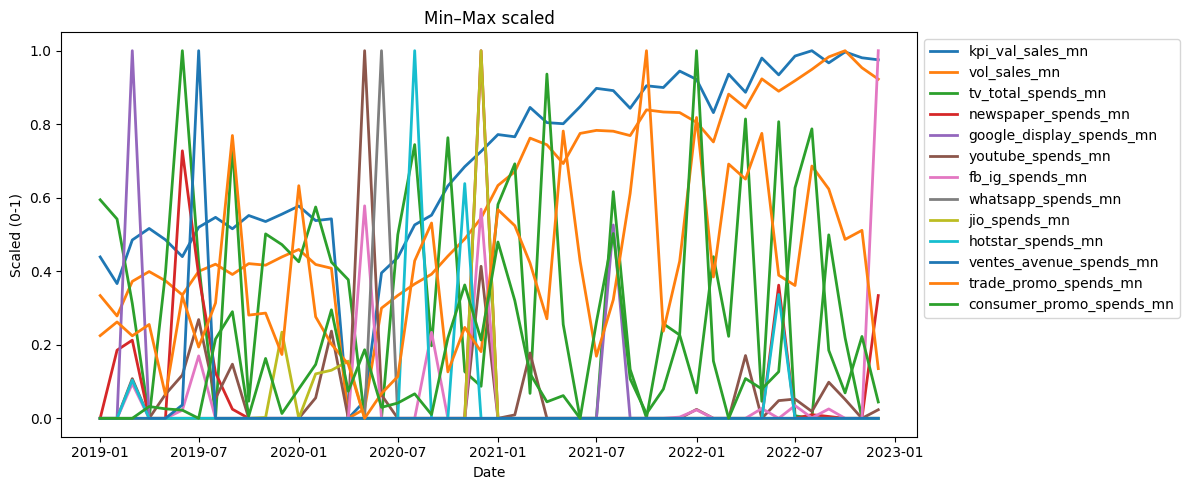

In [165]:
plot_scaled(df, cols, method="minmax", title="Min–Max scaled")


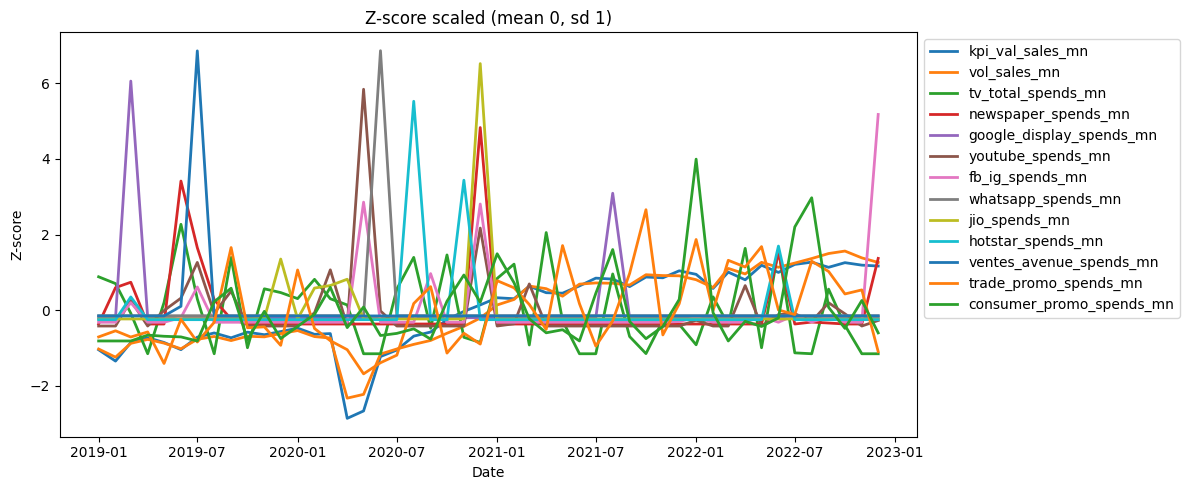

In [166]:
plot_scaled(df, cols, method="zscore", title="Z-score scaled (mean 0, sd 1)")

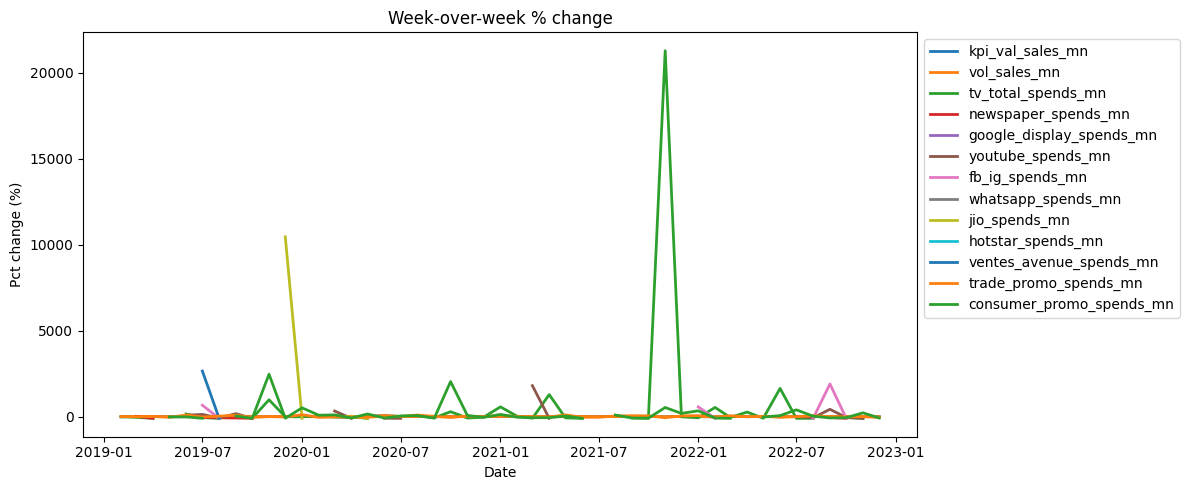

In [167]:
plot_scaled(df, cols, method="pct_change", title="Week-over-week % change")

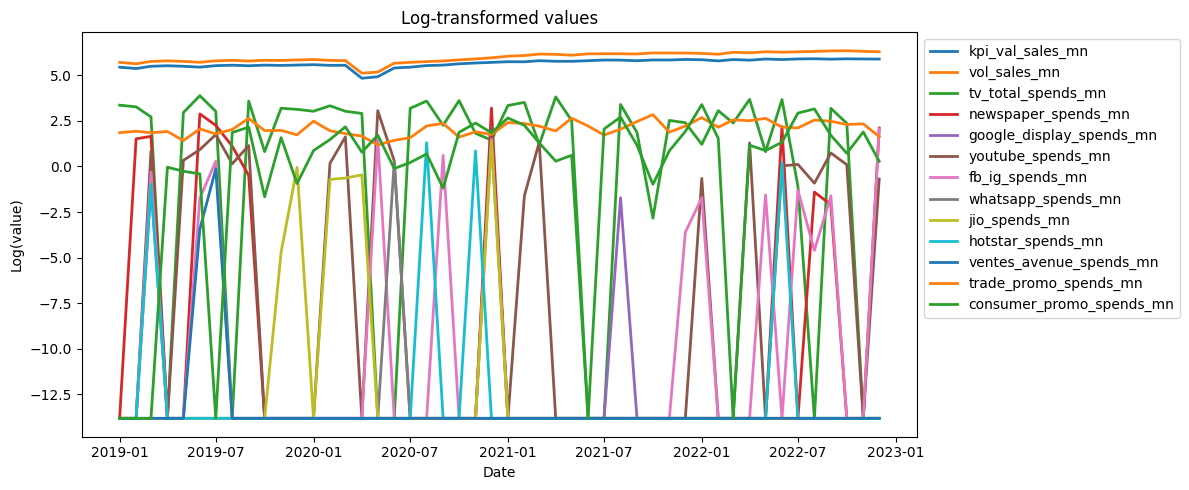

In [168]:
plot_scaled(df, cols, method="log", title="Log-transformed values")

# EDA After modeling

In [169]:

df1 = pd.read_csv(path1)

coef_cols = [c for c in df1.columns if c != 'window']
stats = []
for c in coef_cols:
    vals = df1[c].dropna().values.astype(float)
    mean = np.mean(vals)
    std = np.std(vals, ddof=1) if len(vals) > 1 else 0.0
    cv = std / abs(mean) if mean != 0 else np.inf
    s = np.sign(vals)
    sign_changes = int(((s[1:] * s[:-1]) < 0).sum()) if len(s) > 1 else 0
    stats.append({
        'feature': c,
        'mean': mean,
        'std': std,
        'cv': cv,
        'sign_changes': sign_changes,
        'min': np.min(vals),
        'max': np.max(vals)
    })

stats_df = pd.DataFrame(stats).sort_values('cv', ascending=False)
stats_df


,feature,mean,std,cv,sign_changes,min,max
10,ventes_avenue_spends_mn_ad,0.557237,0.866686,1.555328,0,0.054324,1.557996
4,google_display_spends_mn_ad,-0.353794,0.256594,0.725266,0,-0.594340,-0.083708
8,jio_spends_mn_ad,-0.027527,0.015091,0.548236,0,-0.044573,-0.015869
12,consumer_promo_spends_mn_ad,0.003595,0.001592,0.442791,0,0.002114,0.005278
6,fb_ig_spends_mn_ad,0.016570,0.005792,0.349572,0,0.009971,0.020813
9,hotstar_spends_mn_ad,0.089093,0.027199,0.305283,0,0.070989,0.120371
3,newspaper_spends_mn_ad,0.035672,0.009014,0.252705,0,0.027662,0.045433
5,youtube_spends_mn_ad,-0.049034,0.009713,0.198083,0,-0.058171,-0.038833
2,tv_total_spends_mn_ad,0.001385,0.000237,0.171149,0,0.001206,0.001654
11,trade_promo_spends_mn_ad,0.007101,0.000585,0.082362,0,0.006645,0.007761


c:\Users\akhand_Coding\anaconda3\envs\mmm_env\lib\site-packages\statsmodels\stats\outliers_influence.py:198: RuntimeWarning: divide by zero encountered in scalar divide
  vif = 1. / (1. - r_squared_i)



--- VIF Table ---
                               feature          VIF
0                                const  5205.373769
1                         wtd_dist_max    27.434518
2                         num_dist_max    18.679985
3                trade_promo_spends_mn     3.034634
4             consumer_promo_spends_mn     3.402663
5                  newspaper_spends_mn   263.359299
6                newspaper_impressions   297.863654
7                         tv_total_grp    56.399556
8                             tv_spots    35.443727
9                   tv_total_spends_mn    39.334207
10    competition1_newspaper_spends_mn    34.213001
11  competition1_newspaper_impressions    36.456860
12           competition1_tv_total_grp    34.466857
13               competition1_tv_spots    15.406068
14     competition1_tv_total_spends_mn    32.437613
15    competition2_newspaper_spends_mn    40.531680
16  competition2_newspaper_impressions    28.628415
17           competition2_tv_total_grp    32.

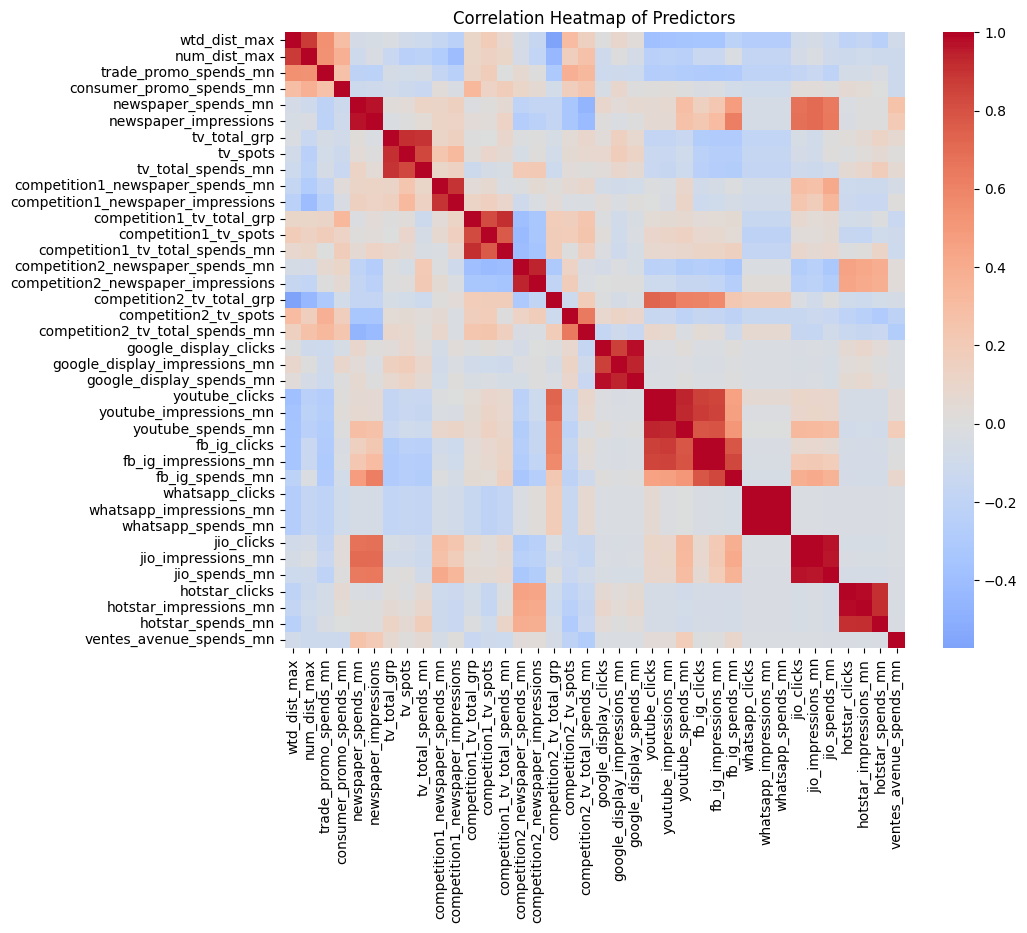

In [170]:
# --- Step 1: Select numeric columns from df ---
num_cols = df.select_dtypes(include=[np.number]).columns.tolist()

# Drop target (if you want only predictors in VIF)
predictors = [c for c in num_cols if c not in ['kpi_val_sales_mn','vol_sales_mn','log_kpi']]

# --- Step 2: Compute VIF ---
X = df[predictors].dropna().astype(float)
X_const = sm.add_constant(X)

vif_data = pd.DataFrame()
vif_data['feature'] = X_const.columns
vif_data['VIF'] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print("\n--- VIF Table ---")
print(vif_data)

# --- Step 3: Correlation heatmap ---
plt.figure(figsize=(10,8))
corr = X.corr()
sns.heatmap(corr, annot=False, cmap='coolwarm', center=0)
plt.title("Correlation Heatmap of Predictors")
plt.show()


Saved plot to C:\Users\akhand_Coding\Desktop\Pub_mmm_Project\outputs\robustness\ridge_alpha_tuning.png


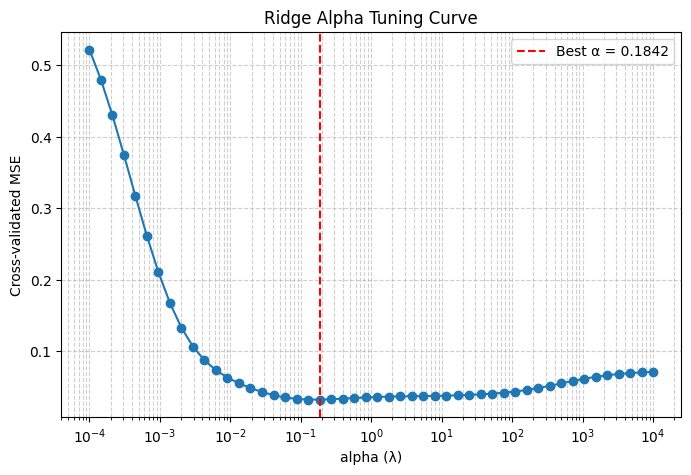

In [ ]:
# eda/ridge_alpha_plot.py
# Load CV results
cv_path = os.path.join(OUT_DIR, "ridge_cv_mse.csv")
alpha_path = os.path.join(OUT_DIR, "ridge_alpha.json")

cv_df = pd.read_csv(cv_path)

# Load best alpha
with open(alpha_path, "r") as f:
    ridge_alpha = json.load(f)
best_alpha = ridge_alpha["best_alpha"]

# Plot CV MSE vs alpha
plt.figure(figsize=(8, 5))
plt.plot(cv_df["alpha"], cv_df["cv_mse"], marker="o", linestyle="-")
plt.xscale("log")
plt.xlabel("alpha (λ)")
plt.ylabel("Cross-validated MSE")
plt.title("Ridge Alpha Tuning Curve")

# Highlight the best alpha
plt.axvline(best_alpha, color="red", linestyle="--", label=f"Best α = {best_alpha:.4f}")
plt.legend()
plt.grid(True, which="both", linestyle="--", alpha=0.6)

# Save plot
plot_path = os.path.join(OUT_DIR, "ridge_alpha_tuning.png")
# plt.savefig(plot_path, dpi=300, bbox_inches="tight")
print(f"Saved plot to {plot_path}")

# Also show it
plt.show()


Best alpha (grid): 0.1842069969326714
Test MSE at best alpha: 0.0326317970204178


C:\Users\akhand_Coding\AppData\Local\Temp\ipykernel_32108\330578130.py:22: FutureWarning: Calling float on a single element Series is deprecated and will raise a TypeError in the future. Use float(ser.iloc[0]) instead
  print("Test MSE at best alpha:", float(cv.loc[cv['alpha']==best_alpha, 'test_mse']))


Saved plot to: C:\Users\akhand_Coding\Desktop\Pub_mmm_Project\outputs\robustness\ridge_alpha_tuning_full.png


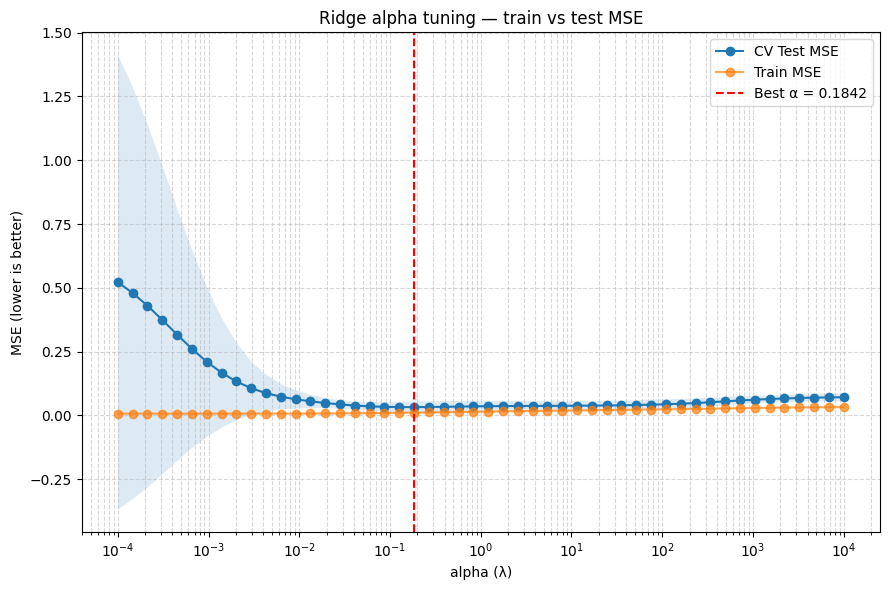

In [ ]:
# produced by GridSearchCV
cv_full_path = os.path.join(OUT_DIR, "ridge_cv_full_results.csv")   
alpha_json_path = os.path.join(OUT_DIR, "ridge_alpha.json")
plot_path = os.path.join(OUT_DIR, "ridge_alpha_tuning_full.png")

# load cv results
cv = pd.read_csv(cv_full_path)

# sklearn stores negative MSE as mean_test_score; convert to positive MSE
cv['alpha'] = cv['param_alpha'].astype(float)
cv['test_mse'] = -cv['mean_test_score'].astype(float)
cv['train_mse'] = -cv['mean_train_score'].astype(float)
cv['std_test_mse'] = cv['std_test_score'].astype(float) 

# find best alpha according to GridSearch (rank 1) OR min test_mse
if 'rank_test_score' in cv.columns:
    best_row = cv[cv['rank_test_score']==1].iloc[0]
    best_alpha = float(best_row['alpha'])
else:
    best_alpha = float(cv.loc[cv['test_mse'].idxmin(), 'alpha'])

print("Best alpha (grid):", best_alpha)
print("Test MSE at best alpha:", float(cv.loc[cv['alpha']==best_alpha, 'test_mse']))

# Plot train vs test MSE vs alpha
plt.figure(figsize=(9,6))
plt.plot(cv['alpha'], cv['test_mse'], marker='o', label='CV Test MSE')
plt.plot(cv['alpha'], cv['train_mse'], marker='o', label='Train MSE', alpha=0.7)
plt.fill_between(cv['alpha'],
                 cv['test_mse'] - cv['std_test_mse'],
                 cv['test_mse'] + cv['std_test_mse'],
                 alpha=0.15)
plt.xscale('log')
plt.xlabel('alpha (λ)')
plt.ylabel('MSE (lower is better)')
plt.title('Ridge alpha tuning — train vs test MSE')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best α = {best_alpha:.4g}')
plt.legend()
plt.tight_layout()
# plt.savefig(plot_path, dpi=300)
# print("Saved plot to:", plot_path)
plt.show()

# Save best alpha for reproducibility (optional)
with open(alpha_json_path, 'w') as f:
    json.dump({'best_alpha': float(best_alpha)}, f, indent=2)


Best alpha (min CV MSE): 0.1842069969326714 with CV MSE: 0.0326317970204178
Saved plot to: C:\Users\akhand_Coding\Desktop\Pub_mmm_Project\outputs\robustness\ridge_alpha_tuning.png


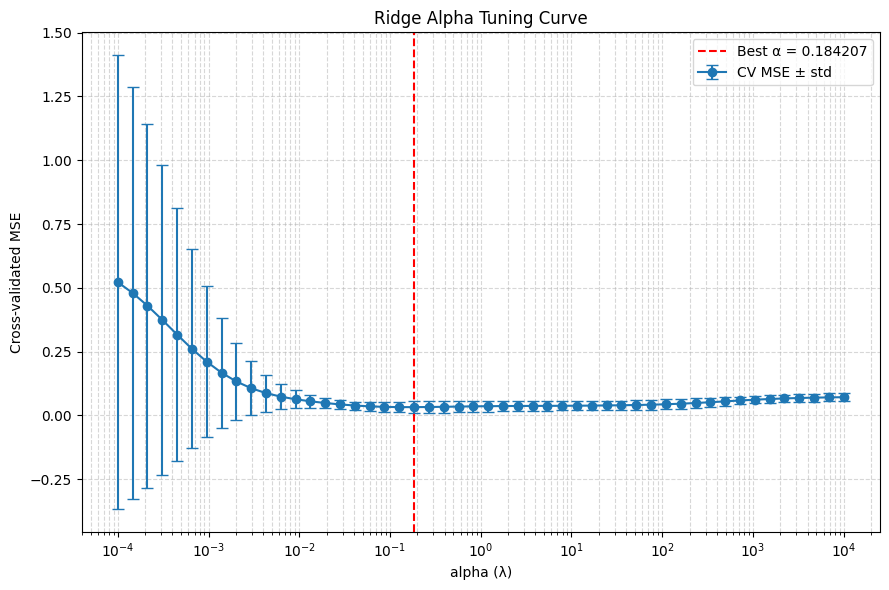

Saved best alpha to: C:\Users\akhand_Coding\Desktop\Pub_mmm_Project\outputs\robustness\ridge_alpha.json


In [ ]:
cv_path = os.path.join(OUT_DIR, "ridge_cv_mse.csv")
plot_path = os.path.join(OUT_DIR, "ridge_alpha_tuning.png")
alpha_json = os.path.join(OUT_DIR, "ridge_alpha.json")

cv = pd.read_csv(cv_path)  
# find best alpha (min cv_mse)
best_idx = cv['cv_mse'].idxmin()
best_alpha = float(cv.loc[best_idx, 'alpha'])
best_mse = float(cv.loc[best_idx, 'cv_mse'])
print("Best alpha (min CV MSE):", best_alpha, "with CV MSE:", best_mse)

plt.figure(figsize=(9,6))
if 'std_test_score' in cv.columns:
    plt.errorbar(cv['alpha'], cv['cv_mse'], yerr=cv['std_test_score'], fmt='o-', capsize=4, label='CV MSE ± std')
else:
    plt.plot(cv['alpha'], cv['cv_mse'], 'o-', label='CV MSE')

plt.xscale('log')
plt.xlabel('alpha (λ)')
plt.ylabel('Cross-validated MSE')
plt.title('Ridge Alpha Tuning Curve')
plt.grid(True, which='both', linestyle='--', alpha=0.5)
plt.axvline(best_alpha, color='red', linestyle='--', label=f'Best α = {best_alpha:.6g}')
plt.legend()
plt.tight_layout()
# plt.savefig(plot_path, dpi=300)
# print("Saved plot to:", plot_path)
plt.show()

# Save best alpha
with open(alpha_json, 'w') as f:
    json.dump({'best_alpha': best_alpha}, f, indent=2)
print("Saved best alpha to:", alpha_json)


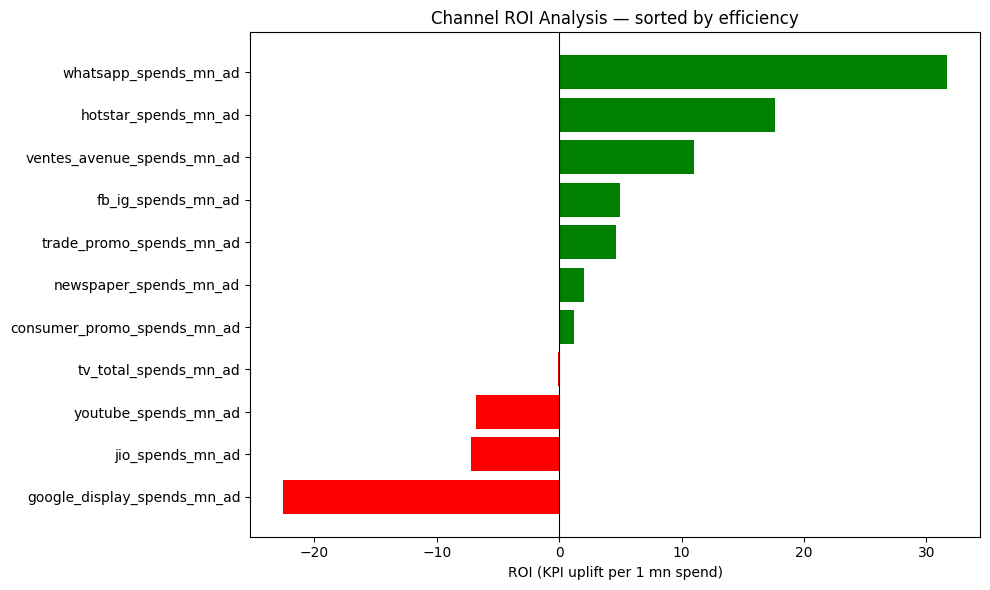

Saved barplot to C:\Users\akhand_Coding\Desktop\Pub_mmm_Project\outputs\robustness\roi_barplot.png


In [ ]:
roi_path = os.path.join(OUT_DIR, "roi_clean.csv")
df = pd.read_csv(roi_path)
# Sort by ROI
df = df.sort_values("roi_kpi_per_mn_spend", ascending=True)

# Colors: green if ROI > 0 else red
colors = ["green" if x > 0 else "red" for x in df["roi_kpi_per_mn_spend"]]

plt.figure(figsize=(10, 6))
plt.barh(df["channel"], df["roi_kpi_per_mn_spend"], color=colors)
plt.axvline(0, color="k", linewidth=0.8)
plt.xlabel("ROI (KPI uplift per 1 mn spend)")
plt.title("Channel ROI Analysis — sorted by efficiency")
plt.tight_layout()

# save_path = os.path.join(OUT_DIR, "roi_barplot.png")
# plt.savefig(save_path, dpi=300)
plt.show()

# print(f"Saved barplot to {save_path}")


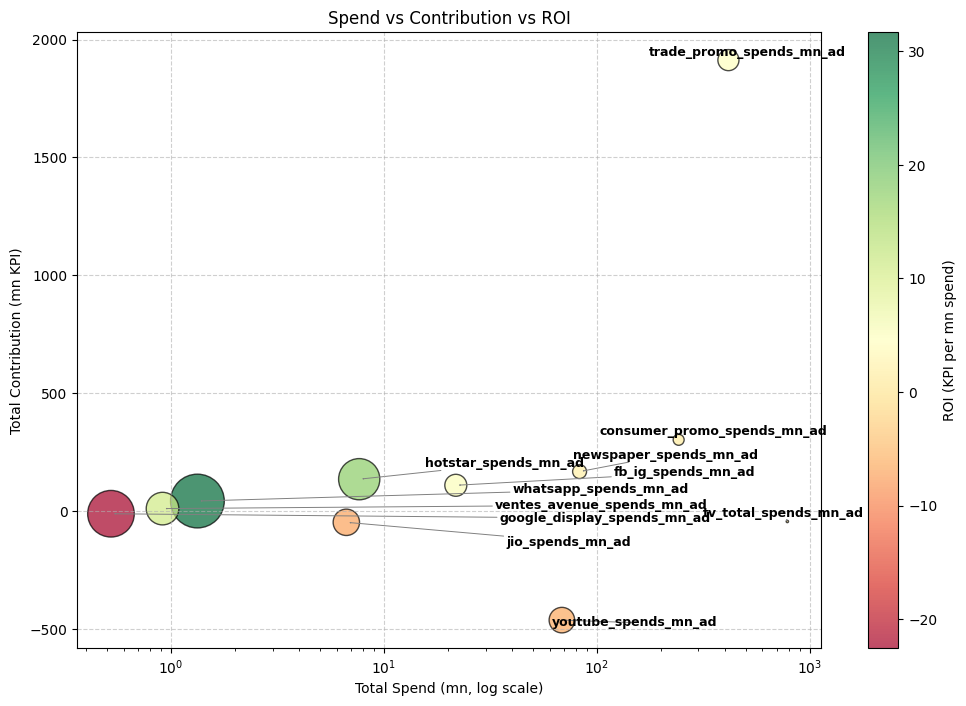

Saved cleaner bubble chart to C:\Users\akhand_Coding\Desktop\Pub_mmm_Project\outputs\robustness\roi_bubble_clean.png


In [ ]:
roi_path = os.path.join(OUT_DIR, "roi_clean.csv")

df = pd.read_csv(roi_path)

# Normalize bubble sizes (clip extremes)
size_scaled = df["roi_kpi_per_mn_spend"].abs().clip(0, 30) * 50

plt.figure(figsize=(12, 8))
scatter = plt.scatter(
    df["total_spend_mn"], 
    df["total_contribution_kpi_mn"],
    s=size_scaled, 
    c=df["roi_kpi_per_mn_spend"], 
    cmap="RdYlGn", 
    alpha=0.7, 
    edgecolors="k"
)

# Add channel labels with adjustText for clarity
texts = []
for i, row in df.iterrows():
    texts.append(
        plt.text(
            row["total_spend_mn"], 
            row["total_contribution_kpi_mn"], 
            row["channel"], 
            fontsize=9, weight="bold"
        )
    )
adjust_text(texts, arrowprops=dict(arrowstyle="->", color="gray", lw=0.7))

# Log scale for spend (better spread)
plt.xscale("log")

plt.xlabel("Total Spend (mn, log scale)")
plt.ylabel("Total Contribution (mn KPI)")
plt.title("Spend vs Contribution vs ROI")
plt.colorbar(scatter, label="ROI (KPI per mn spend)")
plt.grid(True, linestyle="--", alpha=0.6)

# save_path = os.path.join(OUT_DIR, "roi_bubble_clean.png")
# plt.savefig(save_path, dpi=300)
plt.show()

# print(f"Saved cleaner bubble chart to {save_path}")


In [ ]:

# Dynamically resolve project root (works in both scripts & notebooks)
try:
    proj = Path(__file__).resolve().parents[1]   # if running as script
except NameError:
    proj = Path(os.getcwd()).resolve().parents[0]  # if running in Jupyter (inside eda/)

# Output directory
OUT_DIR = proj / "outputs" / "robustness"
# Load CV results
cv_path = OUT_DIR / "ridge_cv_mse.csv"
alpha_path = OUT_DIR / "ridge_alpha.json"
OLS_PATH = OUT_DIR / "ols_coefs.csv"
RIDGE_PATH = OUT_DIR / "robustness" / "ridge_coefs_tuned.csv"

# Ensure output directory exists
os.makedirs(OUT_DIR, exist_ok=True)

# ------------------------
# Load OLS coefficients
# ------------------------
if OLS_PATH.exists():
    ols_df = pd.read_csv(OLS_PATH)
    ols_df.columns = [c.lower() for c in ols_df.columns]
    ols_df = ols_df.rename(columns={"feature": "channel", "coef": "ols_coef"})
else:
    raise FileNotFoundError(f"OLS coefficients not found at {OLS_PATH}")

# ------------------------
# Load Ridge coefficients
# ------------------------
if RIDGE_PATH.exists():
    ridge_df = pd.read_csv(RIDGE_PATH)
    ridge_df.columns = [c.lower() for c in ridge_df.columns]
    ridge_df = ridge_df.rename(columns={"feature": "channel", "coef": "ridge_coef"})
else:
    raise FileNotFoundError(f"Ridge coefficients not found at {RIDGE_PATH}")

# ------------------------
# Merge comparison
# ------------------------
coef_compare = pd.merge(ols_df, ridge_df, on="channel", how="outer")

# Save to CSV
compare_path = OUT_DIR / "coef_comparison.csv"
coef_compare.to_csv(compare_path, index=False, encoding="utf-8-sig")
print(f"Saved coefficient comparison to {compare_path}")

# ------------------------
# Plot coefficients
# ------------------------
ax = coef_compare.set_index("channel")[["ols_coef", "ridge_coef"]].plot(
    kind="bar", figsize=(14, 6)
)
plt.title("OLS vs Ridge Coefficients by Channel", fontsize=14, weight="bold")
plt.ylabel("Coefficient Value")
plt.xlabel("Channel")
plt.xticks(rotation=45, ha="right")
plt.legend(title="Model Type")
plt.tight_layout()

# plot_path = OUT_DIR / "ols_vs_ridge_coefficients.png"
# plt.savefig(plot_path, dpi=300, bbox_inches="tight")
# print(f"Saved plot to {plot_path}")

plt.show()


FileNotFoundError: OLS coefficients not found at C:\Users\akhand_Coding\Desktop\Pub_mmm_Project\outputs\robustness\ols_coefs.csv